In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="whitegrid")

In [2]:
data_sales = pd.read_csv("sales_data.csv", low_memory=False)
data_sales 

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David


In [3]:
data_sales.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie


In [4]:
data_sales.tail()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep
995,1010,2023-04-15,Charlie,North,4733.88,4,Food,4943.03,5442.15,Returning,0.29,Cash,Online,North-Charlie
996,1067,2023-09-07,Bob,North,4716.36,37,Clothing,1754.32,1856.40,New,0.21,Bank Transfer,Retail,North-Bob
997,1018,2023-04-27,David,South,7629.70,17,Clothing,355.72,438.27,Returning,0.06,Bank Transfer,Online,South-David
998,1100,2023-12-20,David,West,1629.47,39,Electronics,3685.03,3743.39,New,0.01,Bank Transfer,Online,West-David
999,1086,2023-08-16,Alice,East,4923.93,48,Food,2632.58,2926.68,Returning,0.14,Cash,Online,East-Alice


In [5]:
data_sales.shape

(1000, 14)

In [6]:
print("The number of rows", data_sales.shape[0])
print("The number of columns", data_sales.shape[1])

The number of rows 1000
The number of columns 14


In [7]:
# Information about the dataset
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Product_ID            1000 non-null   int64  
 1   Sale_Date             1000 non-null   object 
 2   Sales_Rep             1000 non-null   object 
 3   Region                1000 non-null   object 
 4   Sales_Amount          1000 non-null   float64
 5   Quantity_Sold         1000 non-null   int64  
 6   Product_Category      1000 non-null   object 
 7   Unit_Cost             1000 non-null   float64
 8   Unit_Price            1000 non-null   float64
 9   Customer_Type         1000 non-null   object 
 10  Discount              1000 non-null   float64
 11  Payment_Method        1000 non-null   object 
 12  Sales_Channel         1000 non-null   object 
 13  Region_and_Sales_Rep  1000 non-null   object 
dtypes: float64(4), int64(2), object(8)
memory usage: 109.5+ KB


In [8]:
#  Ensure correct date format 
data_sales['Sale_Date'] = pd.to_datetime(data_sales['Sale_Date'], errors='coerce')

# Extract month, month_name and weekday
data_sales['Month'] = data_sales['Sale_Date'].dt.month
data_sales['Month_Name'] = data_sales['Sale_Date'].dt.month_name()
data_sales['Weekday'] = data_sales['Sale_Date'].dt.day_name()
data_sales['Sale_Year'] = data_sales['Sale_Date'].dt.year

In [9]:
#Ensuring a correct date format 
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Product_ID            1000 non-null   int64         
 1   Sale_Date             1000 non-null   datetime64[ns]
 2   Sales_Rep             1000 non-null   object        
 3   Region                1000 non-null   object        
 4   Sales_Amount          1000 non-null   float64       
 5   Quantity_Sold         1000 non-null   int64         
 6   Product_Category      1000 non-null   object        
 7   Unit_Cost             1000 non-null   float64       
 8   Unit_Price            1000 non-null   float64       
 9   Customer_Type         1000 non-null   object        
 10  Discount              1000 non-null   float64       
 11  Payment_Method        1000 non-null   object        
 12  Sales_Channel         1000 non-null   object        
 13  Region_and_Sales_Re

In [10]:
data_sales.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month,Month_Name,Weekday,Sale_Year
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2,February,Friday,2023
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,4,April,Friday,2023
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,9,September,Thursday,2023
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,8,August,Thursday,2023
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,3,March,Friday,2023


In [11]:
# Checking the missing values in dataset

print("Missing value?", data_sales.isnull().values.any())

Missing value? False


In [12]:
# Check for the Duplicate Data
data_sales.duplicated().any()


False

In [13]:
# Overall statistics of DataFrame of the dataset
data_sales.describe()

,Product_ID,Sale_Date,Sales_Amount,Quantity_Sold,Unit_Cost,Unit_Price,Discount,Month,Sale_Year
count,1000.000000,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.00000,1000.000000
mean,1050.128000,2023-07-02 17:42:43.199999744,5019.265230,25.355000,2475.304550,2728.440120,0.15239,6.50600,2023.003000
min,1001.000000,2023-01-01 00:00:00,100.120000,1.000000,60.280000,167.120000,0.00000,1.00000,2023.000000
25%,1024.000000,2023-03-30 00:00:00,2550.297500,13.000000,1238.380000,1509.085000,0.08000,3.00000,2023.000000
50%,1051.000000,2023-06-30 12:00:00,5019.300000,25.000000,2467.235000,2696.400000,0.15000,6.00000,2023.000000
75%,1075.000000,2023-10-12 00:00:00,7507.445000,38.000000,3702.865000,3957.970000,0.23000,10.00000,2023.000000
max,1100.000000,2024-01-01 00:00:00,9989.040000,49.000000,4995.300000,5442.150000,0.30000,12.00000,2024.000000
std,29.573505,NaN,2846.790126,14.159006,1417.872546,1419.399839,0.08720,3.54154,0.054717


In [14]:
# Check unique values for categorical columns
categorical_columns = ['Region', 'Product_Category', 'Sales_Rep', 'Customer_Type', 'Payment_Method']
for col in categorical_columns:
    print(f"Unique values in {col}: {data_sales[col].unique()}")


Unique values in Region: ['North' 'West' 'South' 'East']
Unique values in Product_Category: ['Furniture' 'Food' 'Clothing' 'Electronics']
Unique values in Sales_Rep: ['Bob' 'David' 'Charlie' 'Eve' 'Alice']
Unique values in Customer_Type: ['Returning' 'New']
Unique values in Payment_Method: ['Cash' 'Bank Transfer' 'Credit Card']


# Key Analysis 

In [16]:
# Total Sales by Region:
total_sales_region = data_sales.groupby('Region')['Sales_Amount'].sum()

total_sales_region

Region
East     1259792.93
North    1369612.51
South    1154250.86
West     1235608.93
Name: Sales_Amount, dtype: float64

In [17]:
# Total Sales by Product Category:
total_sales_category = data_sales.groupby('Product_Category')['Sales_Amount'].sum()

total_sales_category

Product_Category
Clothing       1313474.36
Electronics    1243499.64
Food           1201773.54
Furniture      1260517.69
Name: Sales_Amount, dtype: float64

In [18]:
# Average Discount by Region:
avg_discount_region = data_sales.groupby('Region')['Discount'].mean()

avg_discount_region

Region
East     0.162548
North    0.149551
South    0.148319
West     0.148320
Name: Discount, dtype: float64

In [19]:
# Top Sales Representatives:
top_sales_reps = data_sales.groupby('Sales_Rep')['Sales_Amount'].sum().sort_values(ascending=False)

top_sales_reps.head()

Sales_Rep
David      1141737.36
Bob        1080990.63
Eve         970183.99
Alice       965541.77
Charlie     860811.48
Name: Sales_Amount, dtype: float64

In [20]:
# Sales Trend Over Time:
monthly_sales = data_sales.groupby('Month_Name')['Sales_Amount'].sum()

# Sorting the result by calendar month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
monthly_sales = monthly_sales.reindex(month_order)

monthly_sales


Month_Name
January      495420.37
February     368919.36
March        402638.77
April        438992.61
May          389078.76
June         418458.34
July         374242.88
August       443171.28
September    367837.60
October      460378.78
November     467482.90
December     392643.58
Name: Sales_Amount, dtype: float64

In [21]:
# Profitability Analysis: Calculate profit using Unit_Cost and Unit_Price
data_sales['Profit'] = (data_sales['Unit_Price'] - data_sales['Unit_Cost']) * data_sales['Quantity_Sold']

data_sales['Profit'].head(10)

0     2060.46
1     6681.85
2     3295.20
3     5371.08
4      719.42
5     6583.04
6     6243.12
7    12058.44
8    10721.70
9     8171.82
Name: Profit, dtype: float64

In [22]:
# Total profit by region:
total_profit_region = data_sales.groupby('Region')['Profit'].sum()

total_profit_region

Region
East     1650557.20
North    1661461.20
South    1519736.90
West     1656091.77
Name: Profit, dtype: float64

In [23]:
# Total profit by Product Category:
total_profit_category = data_sales.groupby('Product_Category')['Profit'].sum()

total_profit_category

Product_Category
Clothing       1712957.80
Electronics    1574320.06
Food           1421108.05
Furniture      1779461.16
Name: Profit, dtype: float64

In [24]:
# Average Unit Cost and Discount
avg_unit_cost_discount = data_sales[['Unit_Cost', 'Discount']].mean()

avg_unit_cost_discount

Unit_Cost    2475.30455
Discount        0.15239
dtype: float64

In [25]:
# Analyze Discount and Profit relationship
discount_profit_analysis = data_sales.groupby('Discount')['Profit'].mean()

discount_profit_analysis

Discount
0.00    6302.830000
0.01    8122.763514
0.02    5130.542917
0.03    5333.697949
0.04    7027.368421
0.05    8032.342308
0.06    6978.728710
0.07    5924.158182
0.08    7413.122258
0.09    6258.239211
0.10    7430.947838
0.11    6286.818182
0.12    6160.895128
0.13    7719.692581
0.14    7053.411935
0.15    5590.131724
0.16    5464.898095
0.17    5574.810476
0.18    7833.688929
0.19    6506.454815
0.20    4953.930769
0.21    5212.834359
0.22    5974.060909
0.23    6095.898571
0.24    7074.469286
0.25    6622.852250
0.26    6804.576970
0.27    6274.911892
0.28    6311.036296
0.29    7185.346667
0.30    7006.361667
Name: Profit, dtype: float64

# Data Visualizations 

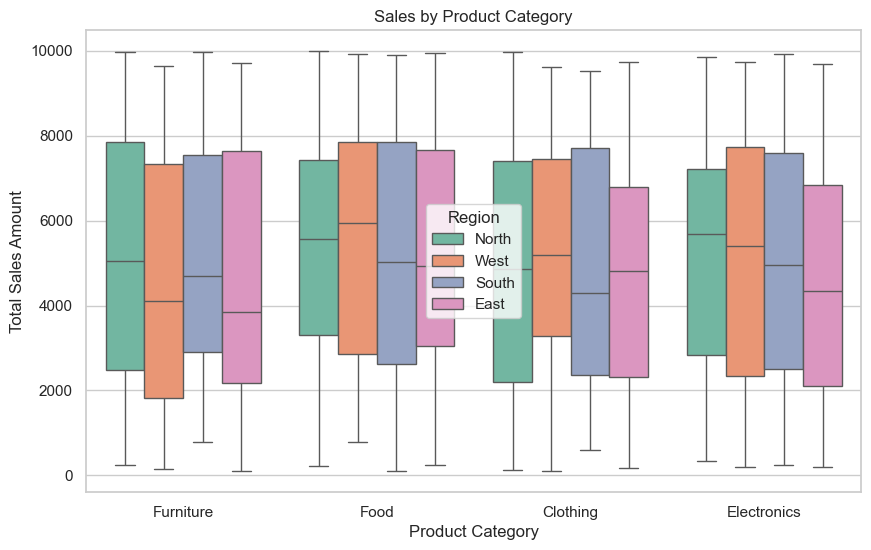

In [27]:
# Sales by Product Category
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product_Category', y='Sales_Amount', data=data_sales, palette='Set2', 
            hue='Region', legend=True)
plt.title('Sales by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Total Sales Amount')
plt.show()

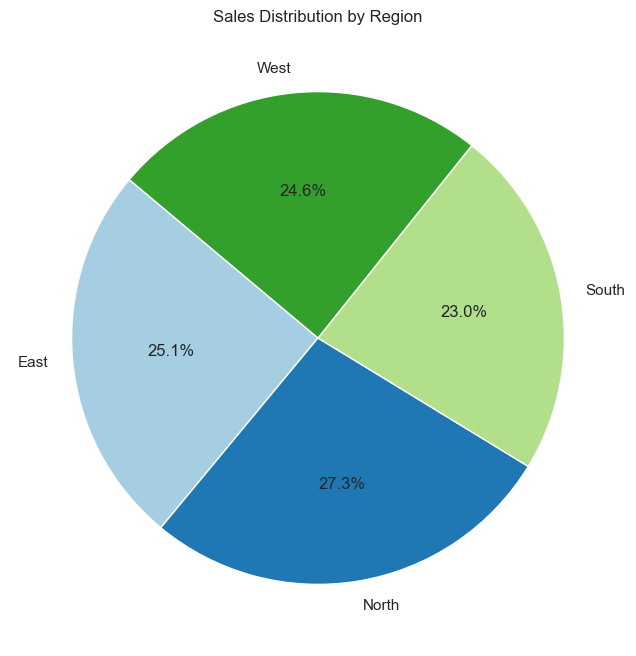

In [28]:
#  Summarizing sales by region
region_analysis = data_sales.groupby('Region')['Sales_Amount'].sum().reset_index()

# Plotting a pie chart for sales distribution by region
plt.figure(figsize=(8, 8))
plt.pie(region_analysis['Sales_Amount'], 
        labels=region_analysis['Region'], 
        autopct='%1.1f%%', 
        startangle=140, 
        colors=plt.cm.Paired.colors)
plt.title('Sales Distribution by Region')
plt.show()

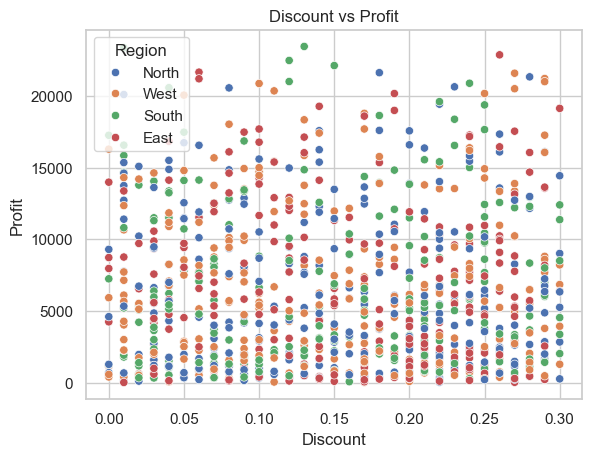

In [29]:
# Scatter plot for Discount vs. Profit
sns.scatterplot(x='Discount', y='Profit', hue = 'Region',  data=data_sales, sizes=(20, 200))
plt.title("Discount vs Profit")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.show()

In [30]:
# Summarizing profit by region
region_profit = data_sales.groupby('Region')['Profit'].sum().reset_index()

region_profit

,Region,Profit
0,East,1650557.20
1,North,1661461.20
2,South,1519736.90
3,West,1656091.77


C:\Users\PC34\AppData\Local\Temp\ipykernel_9560\2016836073.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Profit', data=region_profit, palette='Blues_d')


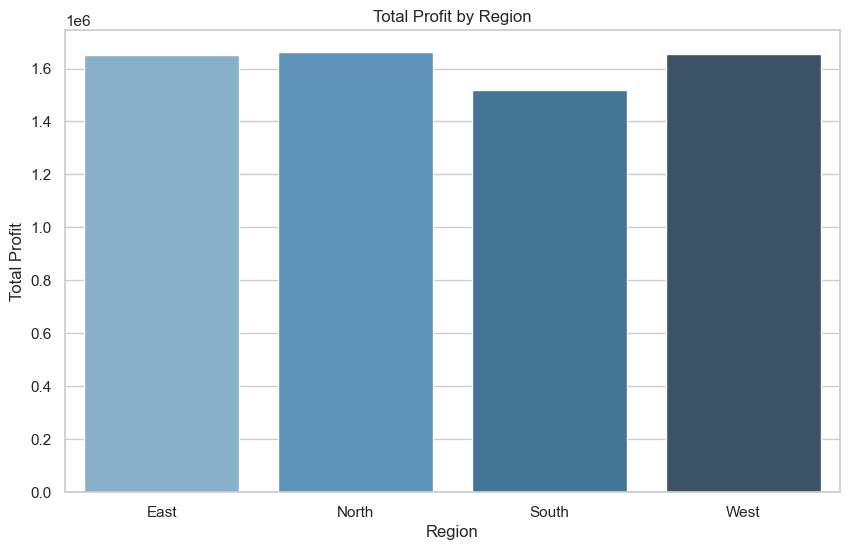

In [31]:
# Plotting a bar graph Profit by Region
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Profit', data=region_profit, palette='Blues_d')
plt.title('Total Profit by Region')
plt.xlabel('Region')
plt.ylabel('Total Profit')
plt.show()

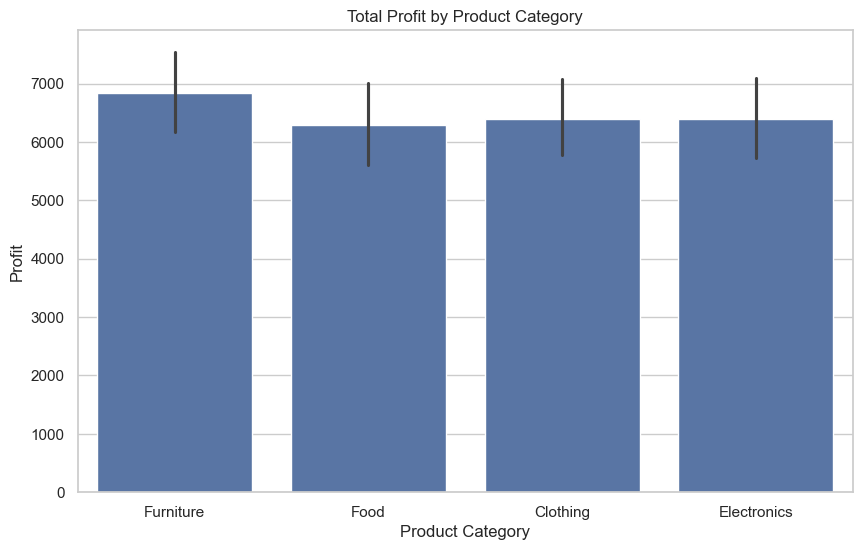

In [32]:
# Total Profit  by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Profit', data=data_sales)
plt.title('Total Profit by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Profit')
plt.show()

In [33]:
# Grouping by Month_Name and sorting in ascending order of Month
sales_over_time = data_sales.groupby(['Month_Name', 'Month'])['Sales_Amount'].sum().reset_index()

# Sorting by the numerical Month column
sales_over_time = sales_over_time.sort_values('Month')

# Dropping the Month column if needed
sales_over_time = sales_over_time.drop(columns='Month')

sales_over_time

,Month_Name,Sales_Amount
4,January,495420.37
3,February,368919.36
7,March,402638.77
0,April,438992.61
8,May,389078.76
6,June,418458.34
5,July,374242.88
1,August,443171.28
11,September,367837.60
10,October,460378.78


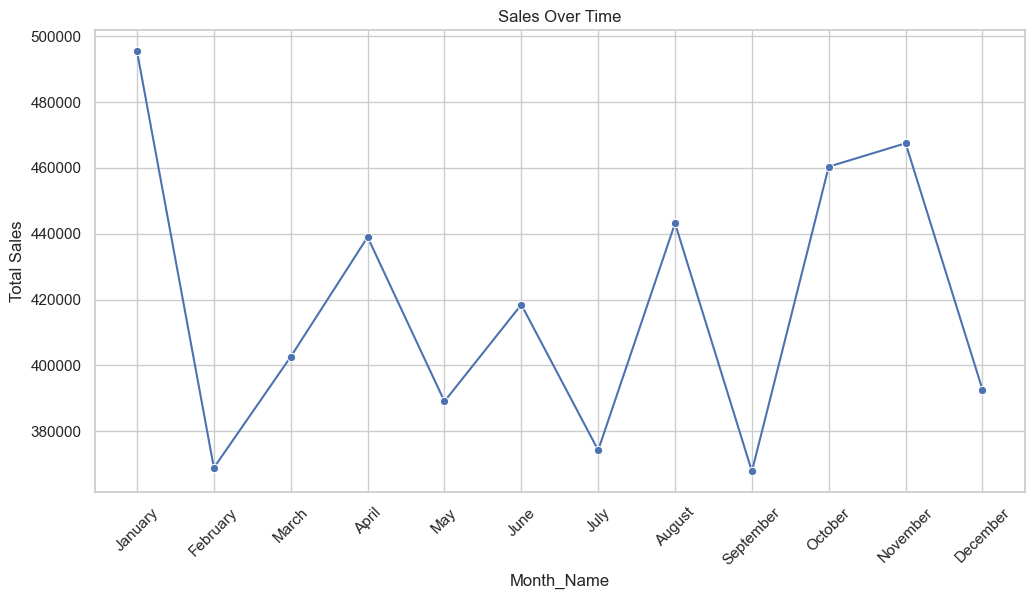

In [34]:
# Plot  a line graph sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Name', y='Sales_Amount', data=sales_over_time, marker='o')
plt.title('Sales Over Time')
plt.xlabel('Month_Name')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [35]:
# Grouping by Month_Name and Month to calculate profits
profits_over_time = data_sales.groupby(['Month_Name', 'Month'])['Profit'].sum().reset_index()

# Sorting by the numerical Month column
profits_over_time = profits_over_time.sort_values('Month')

# Dropping the Month column if it's no longer needed
profits_over_time = profits_over_time.drop(columns='Month')

profits_over_time

,Month_Name,Profit
4,January,677764.60
3,February,478053.08
7,March,528631.81
0,April,496006.82
8,May,489472.15
6,June,605992.20
5,July,447678.76
1,August,558417.69
11,September,472940.52
10,October,584679.83


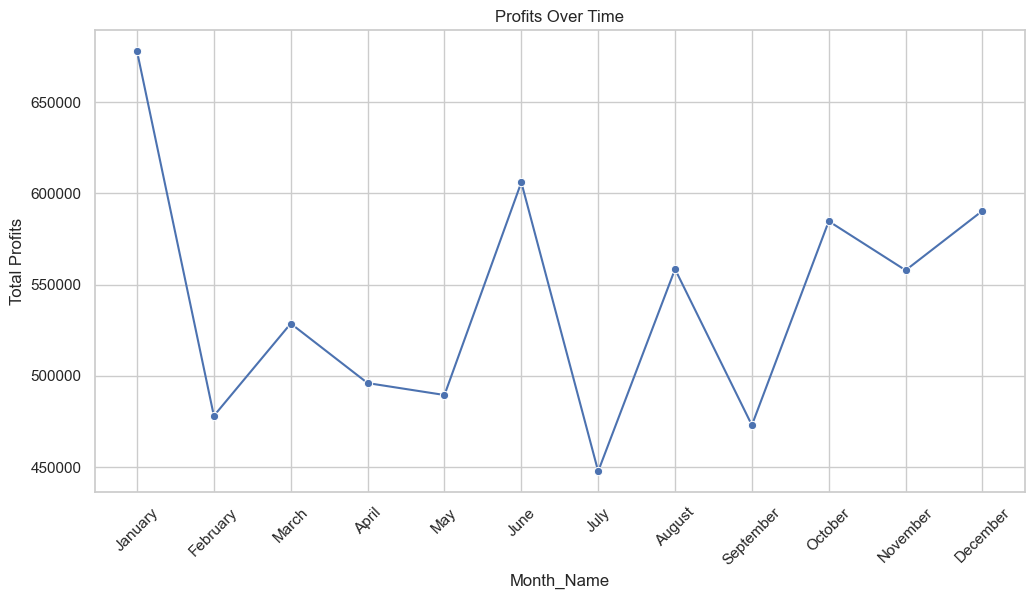

In [36]:
# Plot  a line graph profits over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Month_Name', y='Profit', data=profits_over_time, marker='o')
plt.title('Profits Over Time')
plt.xlabel('Month_Name')
plt.ylabel('Total Profits')
plt.xticks(rotation=45)
plt.show()

In [37]:
data_sales.head()

,Product_ID,Sale_Date,Sales_Rep,Region,Sales_Amount,Quantity_Sold,Product_Category,Unit_Cost,Unit_Price,Customer_Type,Discount,Payment_Method,Sales_Channel,Region_and_Sales_Rep,Month,Month_Name,Weekday,Sale_Year,Profit
0,1052,2023-02-03,Bob,North,5053.97,18,Furniture,152.75,267.22,Returning,0.09,Cash,Online,North-Bob,2,February,Friday,2023,2060.46
1,1093,2023-04-21,Bob,West,4384.02,17,Furniture,3816.39,4209.44,Returning,0.11,Cash,Retail,West-Bob,4,April,Friday,2023,6681.85
2,1015,2023-09-21,David,South,4631.23,30,Food,261.56,371.40,Returning,0.20,Bank Transfer,Retail,South-David,9,September,Thursday,2023,3295.20
3,1072,2023-08-24,Bob,South,2167.94,39,Clothing,4330.03,4467.75,New,0.02,Credit Card,Retail,South-Bob,8,August,Thursday,2023,5371.08
4,1061,2023-03-24,Charlie,East,3750.20,13,Electronics,637.37,692.71,New,0.08,Credit Card,Online,East-Charlie,3,March,Friday,2023,719.42


In [38]:
data_sales['Profit_Margin'] = data_sales['Profit'] / data_sales['Sales_Amount']

print(data_sales[['Product_ID', 'Profit', 'Profit_Margin']].head())

   Product_ID   Profit  Profit_Margin
0        1052  2060.46       0.407691
1        1093  6681.85       1.524138
2        1015  3295.20       0.711517
3        1072  5371.08       2.477504
4        1061   719.42       0.191835


In [39]:
data_sales.columns

Index(['Product_ID', 'Sale_Date', 'Sales_Rep', 'Region', 'Sales_Amount',
       'Quantity_Sold', 'Product_Category', 'Unit_Cost', 'Unit_Price',
       'Customer_Type', 'Discount', 'Payment_Method', 'Sales_Channel',
       'Region_and_Sales_Rep', 'Month', 'Month_Name', 'Weekday', 'Sale_Year',
       'Profit', 'Profit_Margin'],
      dtype='object')

In [40]:
# Ensure weekly_sales is properly defined before manipulating it
weekly_sales = data_sales[['Weekday', 'Sales_Amount']].groupby('Weekday').sum().reset_index()


In [41]:
# Defining the correct weekday order
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_type = pd.CategoricalDtype(categories=weekday_order, ordered=True)

# Converting and sorting the 'Weekday' column
weekly_sales['Weekday'] = weekly_sales['Weekday'].astype(weekday_type)
weekly_sales = weekly_sales.sort_values('Weekday')

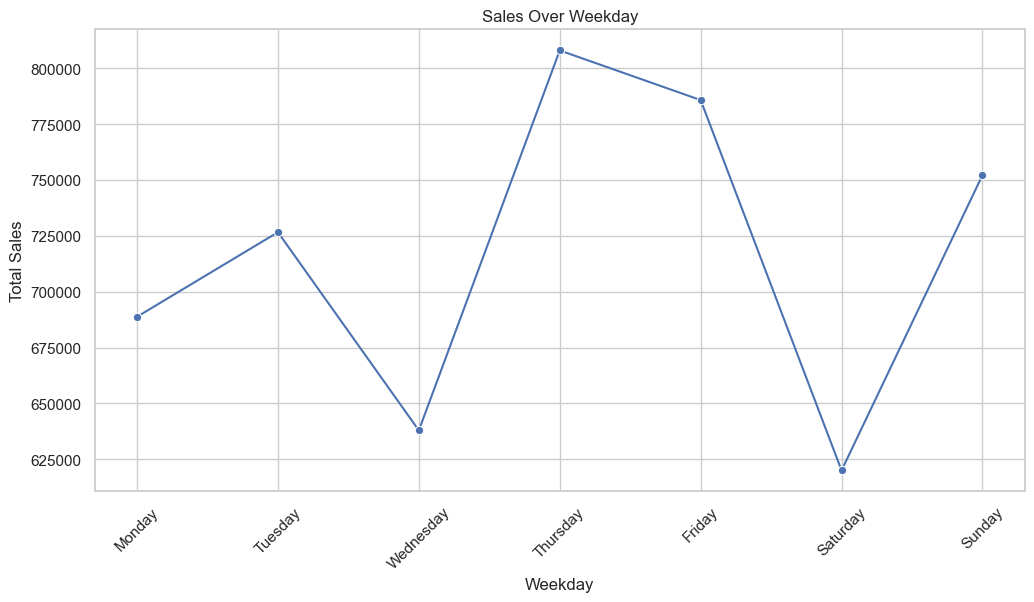

In [42]:
# Plot  a line graph weekly sales over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Weekday', y='Sales_Amount', data=weekly_sales, marker='o')
plt.title('Sales Over Weekday')
plt.xlabel('Weekday')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [43]:
# Summarizing profit by weekday
weekly_profits = data_sales.groupby('Weekday')['Profit'].sum().reset_index()

# Sorting weekdays in the correct order (Monday to Sunday)
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekly_profits['Weekday'] = pd.Categorical(weekly_profits['Weekday'], categories=weekday_order, ordered=True)
weekly_profits = weekly_profits.sort_values('Weekday')

weekly_profits

,Weekday,Profit
1,Monday,865846.11
5,Tuesday,907204.63
6,Wednesday,843182.15
4,Thursday,1148068.71
0,Friday,948057.77
2,Saturday,822945.91
3,Sunday,952541.79


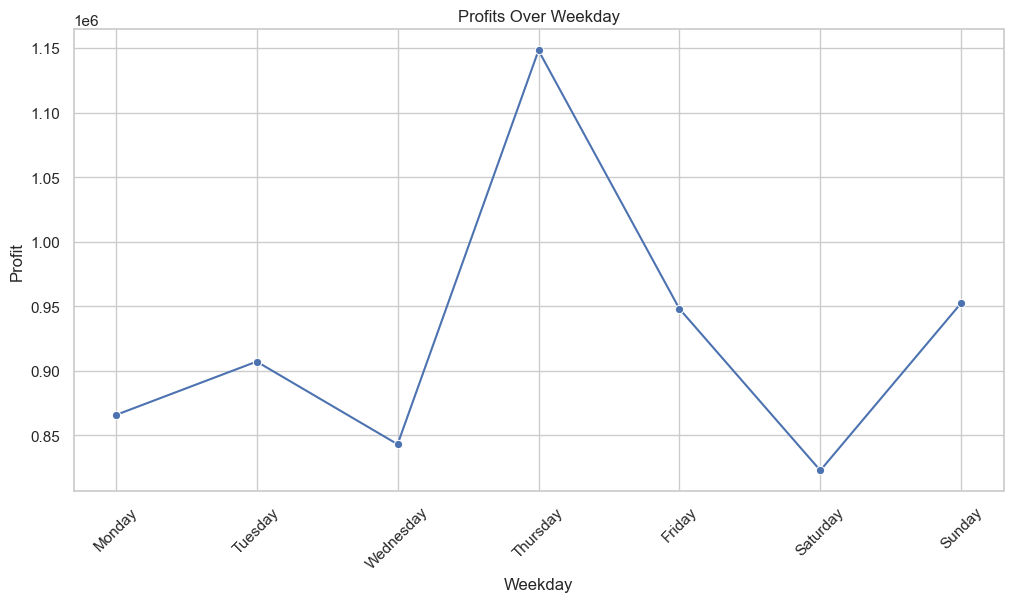

In [44]:
# Plot  a line graph weekly profits over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Weekday', y='Profit', data=weekly_profits, marker='o')
plt.title('Profits Over Weekday')
plt.xlabel('Weekday')
plt.ylabel('Profit')
plt.xticks(rotation=45)
plt.show()

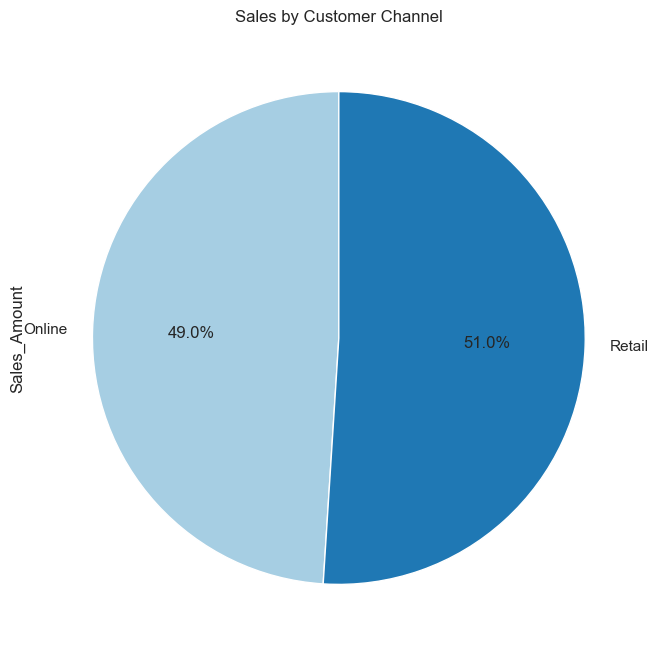

In [45]:
# Grouping sales data by Sales_Channel
sales_vs_channel = data_sales.groupby("Sales_Channel")["Sales_Amount"].sum()

# Creating a pie chart
plt.figure(figsize=(8, 8))
sales_vs_channel.plot.pie(autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title("Sales by Customer Channel")
plt.show()

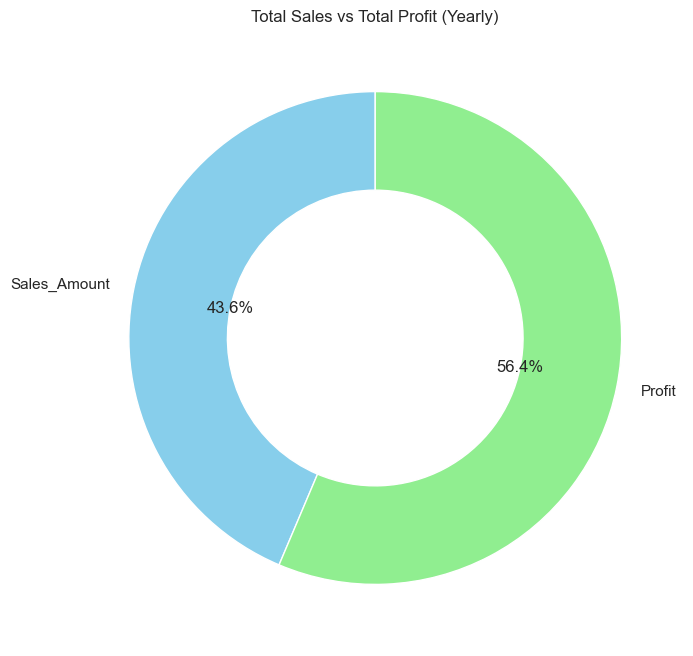

In [46]:
# Summing up sales and profits yearly
yearly_data = data_sales.groupby("Sale_Year")[["Sales_Amount", "Profit"]].sum()

# Creating a donut chart
plt.figure(figsize=(8, 8))
colors = ['skyblue', 'lightgreen'] 
yearly_data.sum().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    colors=colors,
    wedgeprops=dict(width=0.4)
)
plt.title("Total Sales vs Total Profit (Yearly)")
plt.show()

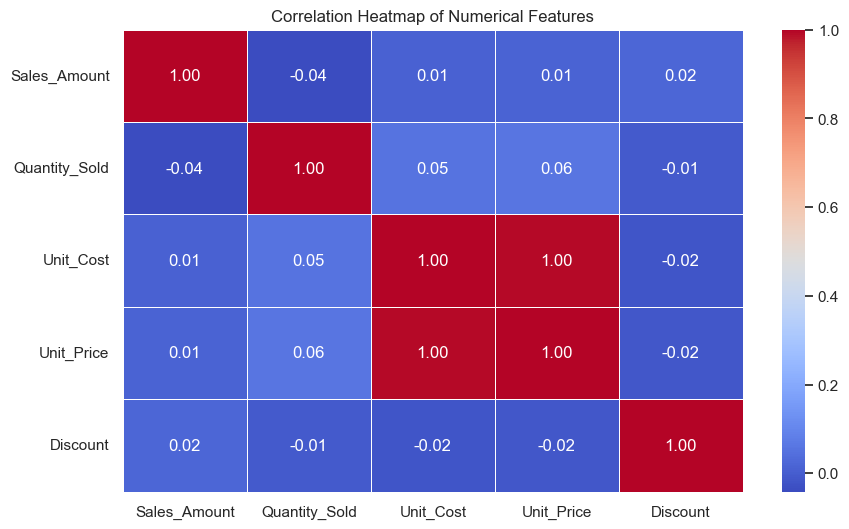

In [47]:
num_cols = ['Sales_Amount', 'Quantity_Sold', 'Unit_Cost', 'Unit_Price', 'Discount']

# Correlation heatmap for numerical variables
plt.figure(figsize=(10, 6))
sns.heatmap(data_sales[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()